(Working Title) Bitcoin as further evidence of "Greater Fool Theory"? 


What is the 'Greater Fool Theory'

The greater fool theory is the theory that states it is possible to make money by buying securities, whether overvalued or not, and later selling them at a profit because there will always be someone (a bigger or greater fool) who is willing to pay the higher price.

Therefore, can we find evidence in the BTC to suggest the phenomena of buying with intent to sell to "greater fools"?

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob

#Collecting files for later importing

path = r'''C:\Users\Garrick\Documents\Springboard\Capstone Project 1\Datasets'''
filenames = list(glob.glob(path + "\*.csv"))
file = filenames[0]

BTC_df = pd.read_csv(file, parse_dates=[0])
BTC_df.columns = ['Date', BTC_df.columns[1]+"_"+file[-9:-4]]
for file in filenames[1:]:
    load = pd.read_csv(file, parse_dates=[0])
    load.columns = ['Date', load.columns[1]+"_"+file[-9:-4]]
    BTC_df = pd.merge(BTC_df, load, on='Date')

print(BTC_df.head())
print(BTC_df.tail())

        Date  Value_AVBLS  Value_CPTRA  Value_MKPRU  Value_MWNTD  Value_MWNUS  \
0 2017-12-27         1.05       161.68     15999.04      45559.0   21272882.0   
1 2017-12-26         1.05       146.59     14119.02      42867.0   21249422.0   
2 2017-12-25         1.06       138.78     13949.17      49434.0   21204476.0   
3 2017-12-24         1.06       139.69     15360.26      40957.0   21165559.0   
4 2017-12-23         1.06       137.02     15190.94      43222.0   21100453.0   

   Value_NADDU  Value_NTRAN  Value_NTRAT  Value_NTRBL   Value_TRVOU  
0     605853.0     247440.0  286214316.0      1742.53  1.745062e+09  
1     565074.0     228926.0  285966876.0      1695.74  1.134113e+09  
2     652209.0     279523.0  285737950.0      1838.96  1.798168e+09  
3     729637.0     308211.0  285458427.0      2217.34  1.967537e+09  
4     890731.0     380648.0  285150216.0      2455.79  5.352016e+09  
           Date  Value_AVBLS  Value_CPTRA  Value_MKPRU  Value_MWNTD  \
3254 2009-01-07     0.

In [29]:
#checking Date column is Datetime for charting
BTC_df.dtypes

Date           datetime64[ns]
Value_AVBLS           float64
Value_CPTRA           float64
Value_MKPRU           float64
Value_MWNTD           float64
Value_MWNUS           float64
Value_NADDU           float64
Value_NTRAN           float64
Value_NTRAT           float64
Value_NTRBL           float64
Value_TRVOU           float64
dtype: object

In [25]:
print(BTC_df.mean())
#getting a baseline of statistical descriptors of each series

Value_AVBLS    2.902875e-01
Value_MKPRU    5.833484e+02
Value_MWNTD    2.387943e+04
Value_MWNUS    3.135797e+06
Value_NADDU    1.619941e+05
Value_NTRAN    8.632420e+04
Value_NTRAT    5.618708e+07
Value_NTRBL    5.692887e+02
Value_TRVOU    4.631122e+07
dtype: float64


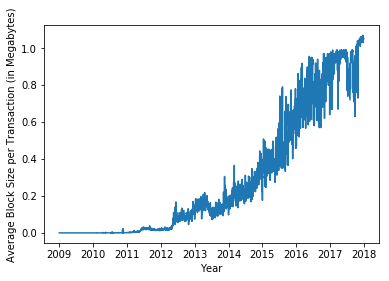

In [34]:
plt.plot(BTC_df['Date'], BTC_df['Value_AVBLS'])
plt.xlabel('Year')
plt.ylabel('Average Block Size per Transaction (in Megabytes)')
plt.show()
#AVG Block Size is 0.28, system is maxed at 1MB - not significant in analysis as this measure refers to the data size of the block sent to the chain
#Another musing worth exploring... if block size has been at max for a substantial amount of time.  This either means the market
#is fast approaching where the greater fools have already entered en masse.

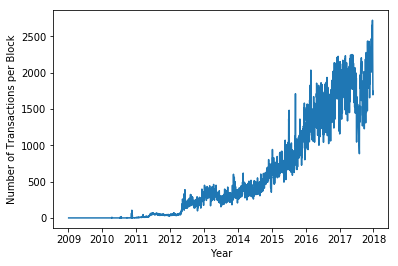

In [32]:
plt.plot(BTC_df['Date'], BTC_df['Value_NTRBL'])
plt.xlabel('Year')
plt.ylabel('Number of Transactions per Block')
plt.show()
#zoom in on 2016-2018

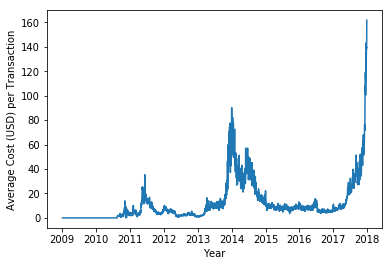

In [31]:
plt.plot(BTC_df['Date'], BTC_df['Value_CPTRA'])
plt.xlabel('Year')
plt.ylabel('BTC miners revenue divided by the number of transactions.')
plt.show()

In [36]:
#want to find BTC sent(transacted) divided by number of transactions to find BTC per transaction (daily)
#BTC_per_txn = 